# Cassandra First
This notebook shows, how we can access Cassandra with Python

In [1]:
# Connect to Cassandra Cluster - and keyspace
from cassandra.cluster import Cluster
cluster = Cluster (['localhost'],port=9042)
from cassandra.query import named_tuple_factory
session = cluster.connect('words',wait_for_all_pools=True)
# insert two rows 
session.execute("insert into worte (wort, anz) values ('hello', 47)")
session.execute("insert into worte (wort, anz) values ('world', 11)")


In [2]:
# select some rows
rows = session.execute('select * from  worte')
list(rows.one())

['hello', 47]

### Read all rows and create a bar plot with pandas

In [3]:
import pandas as pd
liste = []
df = pd.DataFrame()

rows = session.execute('select * from  worte')

for row in rows:
    liste.append([row[0], row[1]])
df = pd.DataFrame(liste, columns = ['wort', 'anzahl'])

df

,wort,anzahl
0,hello,47
1,world,11


<Axes: xlabel='wort'>

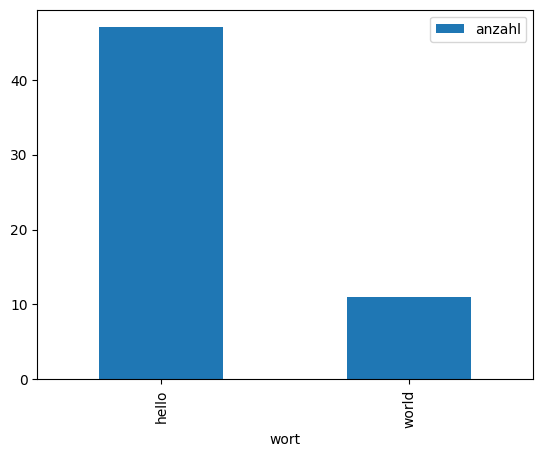

In [4]:
df.plot.bar(x='wort', y='anzahl')
# More examples here : https://www.statology.org/pandas-plot-index/